# ***Import librării***

In [5]:
#Legătură Google Drive pentru a accesa și salva fișierele direct în Drive
from google.colab import drive
drive.mount('/content/drive')

# Importuri pentru Keras și TensorFlow pentru construcția și antrenarea modelului
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Importuri pentru manipularea și procesarea datelor
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Etichetele de semne de circulație***

In [37]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/labels.csv')
df.head(43)

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


# ***Manipularea claselor și pregătirea datelor***

In [7]:
# Inițializează liste goale pentru a stoca informații despre dataset
numberOfSample = []  # Va stoca numărul de mostre pentru fiecare clasă
images = []          # Va stoca imaginile din dataset
classNO = []         # Va stoca etichetele claselor pentru fiecare imagine

# Definirea căii sper setul de date
path = '/content/drive/My Drive/Colab Notebooks/Dataset'

In [8]:
# Listă cu numele directoarelor din calea specificată
myList = os.listdir(path)
print("Total clase:", len(myList))  # Afișăm numărul total de clase
numberOfClasses = len(myList)  # Numărul total de clase

# Parcurgem fiecare clasă și fiecare imagine din aceasta
for x in range(numberOfClasses):
    myPickList = os.listdir(os.path.join(path, str(x)))
    for y in myPickList:
        # Citim imaginea curentă
        currentImage = cv2.imread(os.path.join(path, str(x), str(y)))
        # Redimensionăm imaginea la dimensiunea dorită (32x32)
        currentImage = cv2.resize(currentImage, (32, 32))
        # Adăugăm imaginea și clasa corespunzătoare în listele noastre
        images.append(currentImage)
        classNO.append(x)

print("Numărul total de imagini:", len(images))

# Convertim listele în matrice NumPy
images = np.array(images)  # (număr_imagini, 32, 32, 3)
classNO = np.array(classNO)  # (număr_imagini,)

Total clase: 43
Numărul total de imagini: 34804


# ***Împărțirea datelor în seturi de antrenament și test***

In [9]:
from sklearn.model_selection import train_test_split

# Împărțirea datelor în seturile de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(images, classNO, test_size=0.2, random_state=42)

# Împărțirea datelor de antrenament în seturile de antrenament și validare
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Salvarea datelor în fișiere pickle
with open('/content/drive/My Drive/Colab Notebooks/train1.p', 'wb') as f:
    pickle.dump({'features': X_train, 'labels': y_train}, f)

with open('/content/drive/My Drive/Colab Notebooks/test1.p', 'wb') as f:
    pickle.dump({'features': X_test, 'labels': y_test}, f)

with open('/content/drive/My Drive/Colab Notebooks/valid1.p', 'wb') as f:
    pickle.dump({'features': X_validation, 'labels': y_validation}, f)

In [10]:
# Încărcarea datelor din fișierele pickle
with open('/content/drive/My Drive/Colab Notebooks/train1.p', 'rb') as f:
    train_data = pickle.load(f)

with open('/content/drive/My Drive/Colab Notebooks/test1.p', 'rb') as f:
    test_data = pickle.load(f)

with open('/content/drive/My Drive/Colab Notebooks/valid1.p', 'rb') as f:
    valid_data = pickle.load(f)

In [11]:
# Împărțirea datelor de intrare și etichetelor asociate lor în seturi separate pentru antrenare, validare și testare.

# Extrage caracteristicile (imagini) și etichetele corespunzătoare din setul de date de antrenare
X_train, y_train = train_data['features'], train_data['labels']

# Extrage caracteristicile (imagini) și etichetele corespunzătoare din setul de date de validare
X_val, y_val = valid_data['features'], valid_data['labels']

# Extrage caracteristicile (imagini) și etichetele corespunzătoare din setul de date de testare
X_test, y_test = test_data['features'], test_data['labels']

# Afiseaza dimensiunile matricelor de caracteristici (imagini) pentru fiecare set de date
print(X_train.shape)  # Afiseaza dimensiunile matricei de caracteristici pentru setul de date de antrenare
print(X_val.shape)    # Afiseaza dimensiunile matricei de caracteristici pentru setul de date de validare
print(X_test.shape)   # Afiseaza dimensiunile matricei de caracteristici pentru setul de date de testare


(22274, 32, 32, 3)
(5569, 32, 32, 3)
(6961, 32, 32, 3)


In [12]:
# Verifică dacă numărul de imagini din setul de date de antrenare este egal cu numărul de etichete asociate
assert X_train.shape[0] == y_train.shape[0], "Numărul de imagini nu este egal cu numărul de etichete"

# Verifică dacă numărul de imagini din setul de date de validare este egal cu numărul de etichete asociate
assert X_val.shape[0] == y_val.shape[0], "Numărul de imagini nu este egal cu numărul de etichete"

# Verifică dacă numărul de imagini din setul de date de testare este egal cu numărul de etichete asociate
assert X_test.shape[0] == y_test.shape[0], "Numărul de imagini nu este egal cu numărul de etichete"

# Verifică dacă dimensiunile imaginilor din setul de date de antrenare sunt 32x32x3 (lungime x lățime x canale de culoare RGB)
assert X_train.shape[1:] == (32, 32, 3), "Dimensiunile imaginii nu sunt 32x32x3"

# Verifică dacă dimensiunile imaginilor din setul de date de validare sunt 32x32x3 (lungime x lățime x canale de culoare RGB)
assert X_val.shape[1:] == (32, 32, 3), "Dimensiunile imaginii nu sunt 32x32x3"

# Verifică dacă dimensiunile imaginilor din setul de date de testare sunt 32x32x3 (lungime x lățime x canale de culoare RGB)
assert X_test.shape[1:] == (32, 32, 3), "Dimensiunile imaginii nu sunt 32x32x3"

# ***Vizualizare date***

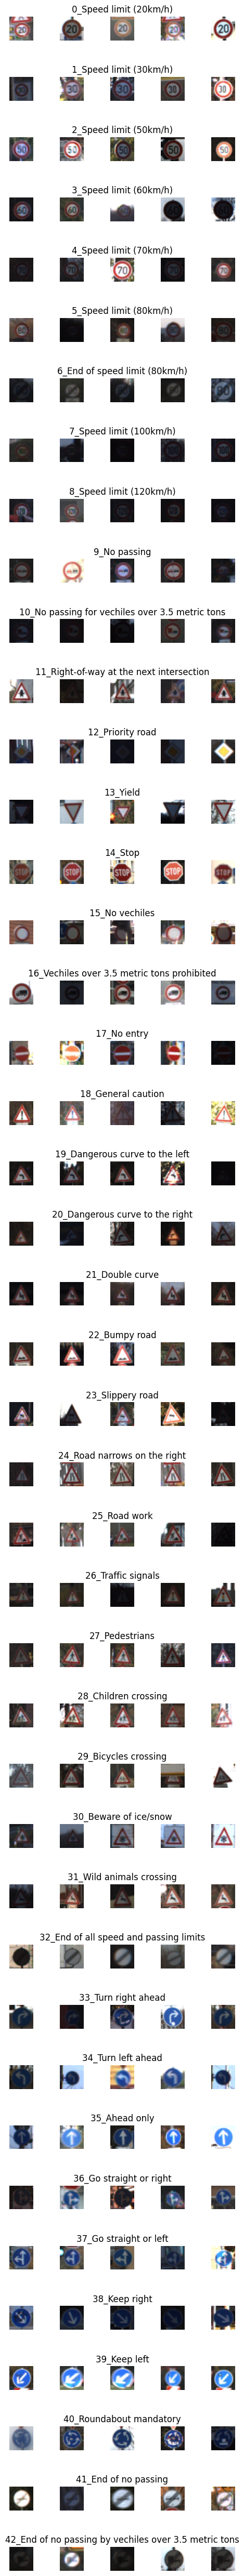

In [13]:
# Încărcarea datelor din fișierul CSV într-un DataFrame pandas
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/labels.csv')

# Lista pentru a stoca numărul de exemple pentru fiecare clasă
num_of_samples = []

# Numărul de coloane pentru a afișa imaginile și numărul total de clase
cols = 5
num_classes = 43

# Crearea unei figuri și a unor axe pentru a afișa imaginile
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 50))
fig.tight_layout()

# Iterarea prin coloane și rânduri pentru a afișa imaginile
for i in range(cols):
    for j, row in data.iterrows():
        # Selectarea imaginilor asociate clasei j din setul de date de antrenare
        x_selected = X_train[y_train == j]

        # Afișarea unei imagini alese aleatoriu pentru clasa j
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap=plt.get_cmap("gray"))

        # Ascunderea axelor pentru a face imaginea mai clară
        axs[j][i].axis("off")

        # Adăugarea titlului care indică clasa și numele clasei
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["Name"])

            # Calcularea și stocarea numărului de exemple pentru fiecare clasă
            num_of_samples.append(len(x_selected))

Numărul de exemple pentru fiecare clasă:
[120, 1276, 1297, 800, 1141, 1034, 210, 832, 783, 837, 1104, 754, 1214, 1221, 423, 345, 234, 648, 718, 115, 192, 180, 218, 300, 154, 868, 339, 148, 321, 162, 255, 435, 141, 381, 240, 664, 215, 116, 1207, 170, 192, 128, 142]


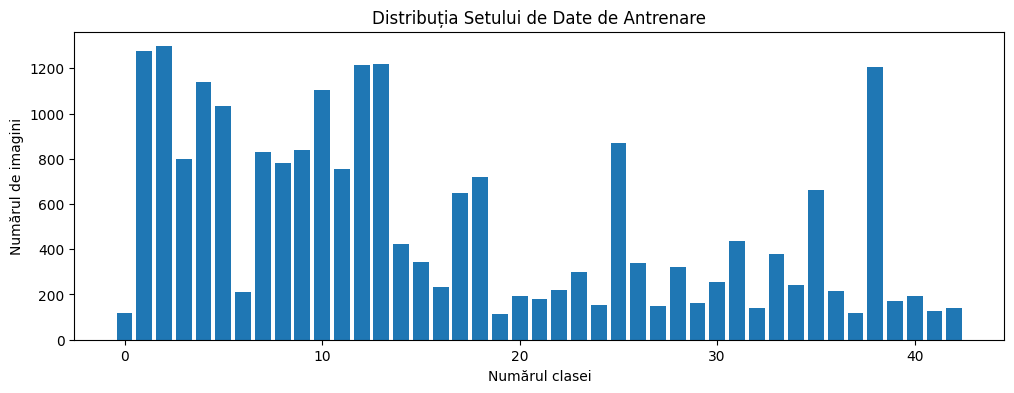

In [14]:
# Afișează numărul de exemple pentru fiecare clasă
print("Numărul de exemple pentru fiecare clasă:")
print(num_of_samples)

# Crează un nou grafic pentru a reprezenta distribuția datelor de antrenare
plt.figure(figsize=(12, 4))

# Afișează un grafic bară cu numărul de exemple pentru fiecare clasă
plt.bar(range(0, num_classes), num_of_samples)

# Adaugă titlul graficului
plt.title("Distribuția Setului de Date de Antrenare")

# Adaugă eticheta axei x
plt.xlabel("Numărul clasei")

# Adaugă eticheta axei y
plt.ylabel("Numărul de imagini")

# Afișează graficul
plt.show()

# ***Procesare date***

Dimensiunile imaginii de la indicele 1000: (32, 32, 3)
Eticheta corespunzătoare imaginii de la indicele 1000: 9


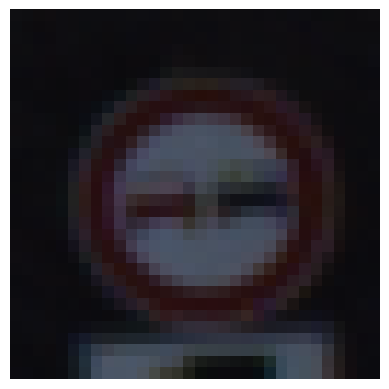

In [15]:
# Afișează imaginea de la indicele 1000 din setul de date de antrenare
plt.imshow(X_train[1000])

# Dezactivează afișarea axelor pentru a face imaginea mai clară
plt.axis('off')

# Afișează dimensiunile imaginii de la indicele 1000
print("Dimensiunile imaginii de la indicele 1000:",X_train[1000].shape)

# Afișează eticheta corespunzătoare imaginii de la indicele 1000
print("Eticheta corespunzătoare imaginii de la indicele 1000:",y_train[1000])

In [16]:
def grayscale(img):
    # Convertim imaginea color la scala de gri folosind cv2
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Dezactivăm afișarea axelor pentru a face imaginea mai clară
    plt.axis('off')

    # Returnăm imaginea în scala de gri
    return image
# def grayscale(img):
#     # Verificăm dacă imaginea are mai mult de un canal de culoare
#     if len(img.shape) == 3 and img.shape[2] == 3:
#         # Convertim imaginea color la scala de gri folosind cv2
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     return img

Dimensiunile imaginii convertite la scala de gri:
(32, 32)


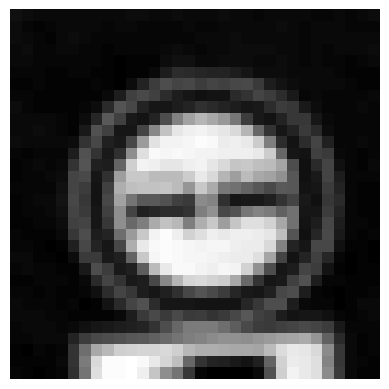

In [17]:
# Convertim imaginea de la indicele 1000 din setul de date de antrenare la scala de gri folosind funcția grayscale
img = grayscale(X_train[1000])

# Afișăm imaginea convertită la scala de gri
plt.imshow(img, cmap='gray')

# Afișăm dimensiunile imaginii convertite
print("Dimensiunile imaginii convertite la scala de gri:")
print(img.shape)

In [18]:
def equalize(img):
    # Aplicăm echilibrarea histogramei pe imagine folosind cv2
    img = cv2.equalizeHist(img)

    # Returnăm imaginea egalizată
    return img

Dimensiunile imaginii egalizate:
(32, 32)


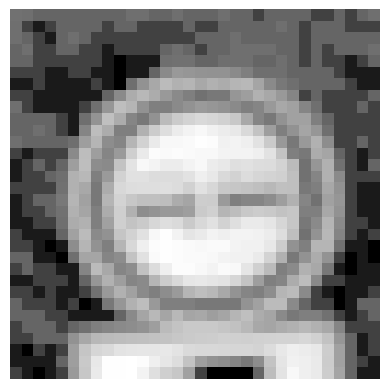

In [19]:
# Aplicăm funcția de egalizare a histogramei pe imaginea convertită la scala de gri
img = equalize(img)

# Afișăm imaginea egalizată
plt.imshow(img, cmap='gray')

# Dezactivăm afișarea axelor pentru a face imaginea mai clară
plt.axis('off')

# Afișăm dimensiunile imaginii egalizate
print("Dimensiunile imaginii egalizate:")
print(img.shape)

In [20]:
def preprocessing(img):
    # Convertim imaginea la scala de gri folosind funcția grayscale
    img = grayscale(img)

    # Aplicăm egalizarea histogramei pe imaginea în scala de gri folosind funcția equalize
    img = equalize(img)

    # Normalizăm valorile pixelilor la intervalul [0, 1]
    img = img / 255.0

    # Returnăm imaginea preprocesată
    return img

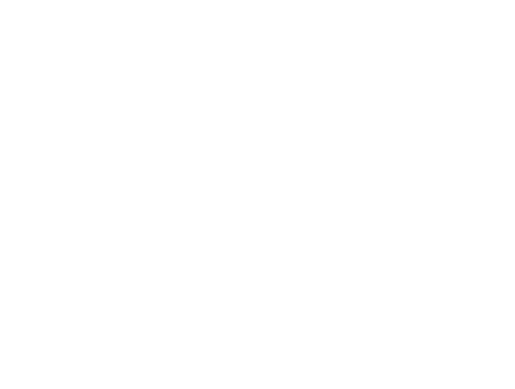

In [21]:
# Aplică funcția de preprocesare pe fiecare imagine din setul de date de antrenare și obține o nouă matrice de caracteristici pentru antrenare
X_train = np.array(list(map(preprocessing, X_train)))

# Aplică funcția de preprocesare pe fiecare imagine din setul de date de validare și obține o nouă matrice de caracteristici pentru validare
X_val = np.array(list(map(preprocessing, X_val)))

# Aplică funcția de preprocesare pe fiecare imagine din setul de date de testare și obține o nouă matrice de caracteristici pentru testare
X_test = np.array(list(map(preprocessing, X_test)))

In [22]:
# Reorganizează dimensiunile matricelor de caracteristici pentru a fi compatibile cu cerințele modelului de rețea neurală convoluțională
# (numărul de exemple, înălțime, lățime, canale de culoare)
# Pentru setul de date de antrenare
X_train = X_train.reshape(22274, 32, 32, 1)

# Pentru setul de date de validare
X_val = X_val.reshape(5569, 32, 32, 1)

# Pentru setul de date de testare
X_test = X_test.reshape(6961, 32, 32, 1)

In [23]:
# Importă clasa ImageDataGenerator din keras.preprocessing.image pentru generarea augmentării datelor
from keras.preprocessing.image import ImageDataGenerator

# Inițializează un obiect ImageDataGenerator pentru a aplica diverse transformări de augmentare a datelor
datagen = ImageDataGenerator(
    # Translație aleatorie pe orizontală cu o rată maximă de deplasare de 10% din lățimea imaginii
    width_shift_range=0.1,
    # Translație aleatorie pe verticală cu o rată maximă de deplasare de 10% din înălțimea imaginii
    height_shift_range=0.1,
    # Zoom aleatoriu în intervalul [0.8, 1.2], unde 1.0 reprezintă fără zoom
    zoom_range=0.2,
    # Îndoire aleatorie cu o rată maximă de 10 grade
    shear_range=0.1,
    # Rotație aleatorie cu un unghi maxim de 10 grade
    rotation_range=10
)

# Aplică ajustările de date definite de ImageDataGenerator pe setul de date de antrenare pentru a genera imagini augmentate
datagen.fit(X_train)

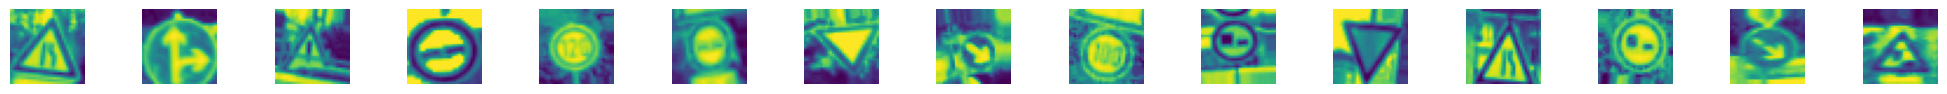

In [24]:
# Creează un generator de loturi de date folosind ImageDataGenerator pentru a genera loturi de date augmentate
batches = datagen.flow(X_train, y_train, batch_size=20)

# Obține un singur lot de date augmentate din generatorul de loturi de date
X_batch, y_batch = next(batches)

# Crează o figură cu o singură linie și 15 coloane pentru a afișa lotul de date augmentate
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

# Afisează fiecare imagine din lotul de date augmentate
for i in range(15):
    # Afișează imaginea din lotul de date augmentate, remodelând-o la dimensiunea originală (32x32)
    axs[i].imshow(X_batch[i].reshape(32, 32))
    # Dezactivează afișarea axelor pentru a face imaginea mai clară
    axs[i].axis('off')

In [25]:
# Converteste etichetele claselor în formatul one-hot encoding folosind funcția to_categorical din keras.utils
# pentru setul de date de antrenare, setul de date de validare și setul de date de testare
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

# ***Rețea neuronală***

In [27]:
def My_model():
    # Inițializează un model secvențial folosind Sequential din keras.models
    model = Sequential()

    # Adaugă un strat Conv2D cu 60 de filtre de dimensiune 5x5, funcție de activare 'relu' și formă de intrare (32, 32, 1)
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))

    # Adaugă un alt strat Conv2D cu 60 de filtre de dimensiune 5x5 și funcție de activare 'relu'
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))

    # Adaugă un strat de MaxPooling2D cu dimensiunea ferestrei de 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Adaugă un strat Conv2D cu 30 de filtre de dimensiune 3x3 și funcție de activare 'relu'
    model.add(Conv2D(30, (3, 3), activation='relu'))

    # Adaugă un alt strat Conv2D cu 30 de filtre de dimensiune 3x3 și funcție de activare 'relu'
    model.add(Conv2D(30, (3, 3), activation='relu'))

    # Adaugă un alt strat de MaxPooling2D cu dimensiunea ferestrei de 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Adaugă un strat de aplatizare pentru a transforma ieșirea Conv2D într-un vector unidimensional
    model.add(Flatten())

    # Adaugă un strat Dense cu 500 de neuroni și funcție de activare 'relu'
    model.add(Dense(500, activation='relu'))

    # Adaugă un strat de dropout cu o rată de dropout de 0.5 pentru a preveni supraantrenarea
    model.add(Dropout(0.5))

    # Adaugă un strat Dense final cu numărul de clase și funcție de activare 'softmax'
    model.add(Dense(num_classes, activation='softmax'))

    # Compilează modelul folosind optimizatorul Adam, funcția de pierdere 'categorical_crossentropy' și metrica de 'accuracy'
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Returnează modelul compilat
    return model

In [28]:
# Creează un model folosind funcția My_model() pentru a obține modelul compilat
model = My_model()

# Afișează un rezumat al arhitecturii modelului pentru a oferi o descriere succintă a acestuia
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [29]:
# Antrenează modelul folosind generatorul de date datagen pentru a furniza loturi de date augmentate
# steps_per_epoch specifică numărul total de pași (batches) pe epocă, aici este lungimea setului de antrenare împărțită la dimensiunea lotului
# epochs specifică numărul de epoci de antrenare
# validation_data specifică datele de validare pentru a evalua performanța modelului la fiecare epocă
# shuffle specifică dacă să amestece datele la fiecare epocă
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=50),  # Generatorul de date pentru a furniza loturi de date augmentate
    steps_per_epoch=len(X_train) / 250,  # Numărul total de pași (batches) pe epocă
    epochs=10,  # Numărul de epoci de antrenare
    validation_data=(X_val, y_val),  # Datele de validare
    shuffle=1  # Amestecarea datelor la fiecare epocă
)

Epoch 1/10
89/89 [==============================] - 67s 739ms/step - loss: 3.5286 - accuracy: 0.0558 - val_loss: 3.2425 - val_accuracy: 0.1494
Epoch 2/10
89/89 [==============================] - 65s 728ms/step - loss: 2.8585 - accuracy: 0.2369 - val_loss: 1.7675 - val_accuracy: 0.5331
Epoch 3/10
89/89 [==============================] - 57s 637ms/step - loss: 1.9602 - accuracy: 0.4356 - val_loss: 1.0806 - val_accuracy: 0.7253
Epoch 4/10
89/89 [==============================] - 65s 732ms/step - loss: 1.4699 - accuracy: 0.5642 - val_loss: 0.6587 - val_accuracy: 0.8159
Epoch 5/10
89/89 [==============================] - 64s 723ms/step - loss: 1.2493 - accuracy: 0.6147 - val_loss: 0.4894 - val_accuracy: 0.8599
Epoch 6/10
89/89 [==============================] - 59s 660ms/step - loss: 1.0387 - accuracy: 0.6940 - val_loss: 0.3716 - val_accuracy: 0.8915
Epoch 7/10
89/89 [==============================] - 65s 734ms/step - loss: 0.8881 - accuracy: 0.7249 - val_loss: 0.2762 - val_accuracy: 0.9215

Text(0.5, 0, 'epoch')

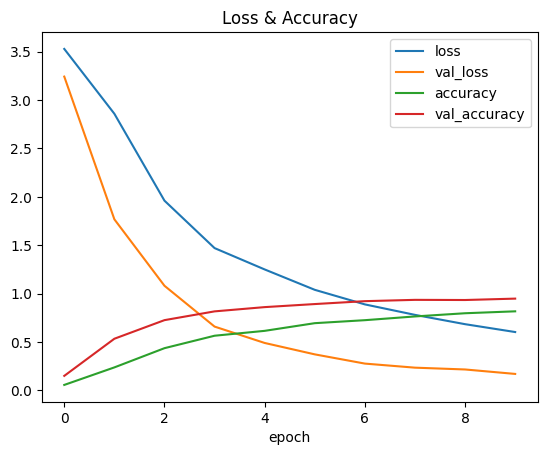

In [30]:
# Afișează graficul evoluției pierderii (loss) pe setul de antrenare și pe setul de validare pe parcursul epocilor
# De asemenea, afișează graficul evoluției acurateței (accuracy) pe setul de antrenare și pe setul de validare pe parcursul epocilor
plt.plot(history.history['loss'])  # Graficul pierderii (loss) pe setul de antrenare
plt.plot(history.history['val_loss'])  # Graficul pierderii (loss) pe setul de validare
plt.plot(history.history['accuracy'])  # Graficul acurateței (accuracy) pe setul de antrenare
plt.plot(history.history['val_accuracy'])  # Graficul acurateței (accuracy) pe setul de validare

# Adaugă legenda pentru fiecare linie din grafic
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

# Adaugă un titlu graficului
plt.title('Loss & Accuracy')

# Adaugă eticheta pentru axa x
plt.xlabel('epoch')

In [31]:
# Evaluează performanța modelului pe setul de date de testare
# verbose controlează modul de afișare a progresului evaluării
score = model.evaluate(X_test, y_test, verbose=1)

# Afișează scorul pierderii (loss) pe setul de date de testare
print('Test Score:', score[0])

# Afișează acuratețea (accuracy) modelului pe setul de date de testare
print('Test Accuracy:', score[1])



218/218 [==============================] - 31s 140ms/step - loss: 0.1543 - accuracy: 0.9516
Test Score: 0.15425129234790802
Test Accuracy: 0.951587438583374


# ***Testare***

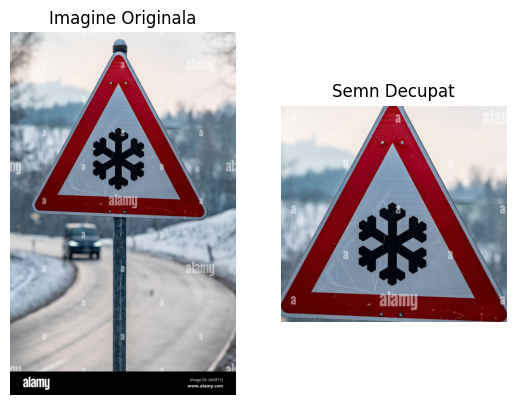

In [52]:
# # Importă modulul requests pentru a efectua cereri HTTP
# import requests

# # Importă modulul matplotlib.pyplot pentru afișarea imaginilor
# import matplotlib.pyplot as plt

# # Importă modulul Image din PIL pentru manipularea imaginilor
# from PIL import Image

# # URL-ul imaginii pe care dorim să o descărcăm
# url = 'https://media.promotor.ro/2qJr57rATyv1FEDJn5DuSDRYMss=/1200x675/smart/filters:contrast(5):format(webp):quality(80)/https%3A%2F%2Fwww.promotor.ro%2Fwp-content%2Fuploads%2F2021%2F07%2FLimita-de-viteza-30-1024x683.jpg'

# # Efectuează o cerere GET către URL-ul imaginii și obține răspunsul sub formă de flux de date
# r = requests.get(url, stream=True)

# # Deschide imaginea utilizând modulul Image și fluxul de date obținut din cererea HTTP
# image = Image.open(r.raw)

# # Dezactivează afișarea axelor pentru a face imaginea mai clară
# plt.axis('off')

# # Afișează imaginea utilizând matplotlib.pyplot, folosind o colțuri de culoare gri
# plt.imshow(image, cmap=plt.get_cmap('gray'))
import requests
from PIL import Image

# Functia pentru a descarca imaginea de la URL
def download_image(url):
    r = requests.get(url, stream=True)
    image = Image.open(r.raw)
    return image

# Functia pentru a decupa semnul din imagine
def crop_sign(image):
    # Convertim imaginea la un array numpy
    img_array = np.asarray(image)

    # Convertim imaginea la tonuri de gri
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Aplicam un blur pentru a reduce zgomotul
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicam detectarea marginilor folosind Canny
    edged = cv2.Canny(blurred, 50, 150)

    # Gasim contururile in imaginea binarizata
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Selectam cel mai mare contur, presupunand ca este semnul nostru
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Obtinerea dreptunghiului de delimitare a conturului
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Decuparea imaginii pentru a include doar semnul
        cropped_img = img_array[y:y+h, x:x+w]
        return cropped_img
    else:
        return None

# URL-ul imaginii
url = 'https://c8.alamy.com/comp/2M3F1TJ/bogen-germany-15th-dec-2022-a-traffic-sign-with-a-snowflake-warning-of-slippery-roads-stands-at-the-side-of-the-road-black-ice-continues-to-plague-parts-of-southern-germany-credit-armin-weigeldpaalamy-live-news-2M3F1TJ.jpg'
# Descarcam imaginea
image = download_image(url)

# Decupam semnul din imagine
cropped_image = crop_sign(image)

# Afisam imaginea originala si cea decupata
plt.subplot(1, 2, 1)
plt.title('Imagine Originala')
plt.axis('off')
plt.imshow(image)

if cropped_image is not None:
    plt.subplot(1, 2, 2)
    plt.title('Semn Decupat')
    plt.axis('off')
    plt.imshow(cropped_image)
else:
    print("Nu a fost gasit niciun semn in imagine.")

plt.show()

(32, 32)


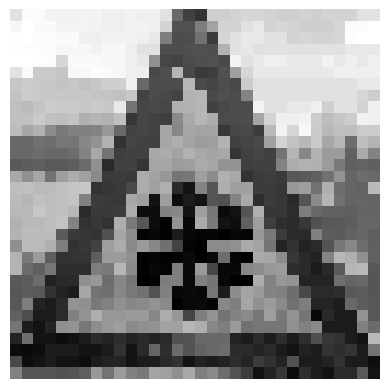

In [53]:
# Converteste imaginea într-o matrice numpy
img = np.asarray(cropped_image)

# Redimensionează imaginea la dimensiunea 32x32 folosind cv2.resize
img = cv2.resize(img, (32, 32))

# Aplică preprocesarea imaginii
img = preprocessing(img)

# Afișează imaginea preprocesată folosind matplotlib.pyplot, folosind o colțuri de culoare gri
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Afișează forma imaginii preprocesate
print(img.shape)

# Redimensionează imaginea pentru a se potrivi cu dimensiunea așteptată a intrării modelului
img = img.reshape(1, 32, 32, 1)

1/1 [==============================] - 0s 25ms/step
Clasa prezisă: 30 - Beware of ice/snow


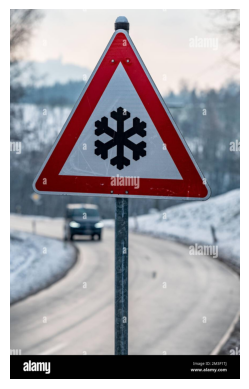

In [54]:
data = {
        0: 'Speed limit (20km/h)',
        1: 'Speed limit (30km/h)',
        2: 'Speed limit (50km/h)',
        3: 'Speed limit (60km/h)',
        4: 'Speed limit (70km/h)',
        5: 'Speed limit (80km/h)',
        6: 'End of speed limit (80km/h)',
        7: 'Speed limit (100km/h)',
        8: 'Speed limit (120km/h)',
        9: 'No passing',
        10: 'No passing for vehicles over 3.5 metric tons',
        11: 'Right-of-way at the next intersection',
        12: 'Priority road',
        13: 'Yield',
        14: 'Stop',
        15: 'No vehicles',
        16: 'Vehicles over 3.5 metric tons prohibited',
        17: 'No entry',
        18: 'General caution',
        19: 'Dangerous curve to the left',
        20: 'Dangerous curve to the right',
        21: 'Double curve',
        22: 'Bumpy road',
        23: 'Slippery road',
        24: 'Road narrows on the right',
        25: 'Road work',
        26: 'Traffic signals',
        27: 'Pedestrians',
        28: 'Children crossing',
        29: 'Bicycles crossing',
        30: 'Beware of ice/snow',
        31: 'Wild animals crossing',
        32: 'End of all speed and passing limits',
        33: 'Turn right ahead',
        34: 'Turn left ahead',
        35: 'Ahead only',
        36: 'Go straight or right',
        37: 'Go straight or left',
        38: 'Keep right',
        39: 'Keep left',
        40: 'Roundabout mandatory',
        41: 'End of no passing',
        42: 'End of no passing by vehicles over 3.5 metric tons'
    }

# Obține vectorul de probabilități pentru fiecare clasă
probabilities = model.predict(img)

# Alege clasa cu cea mai mare probabilitate
predicted_class = np.argmax(probabilities)

# Afișează numele clasei prezise
print("Clasa prezisă:", predicted_class, "-" , data[predicted_class])

plt.imshow(image)
plt.axis('off')
plt.show()


# **Matricea de confuzie**

218/218 [==============================] - 24s 110ms/step


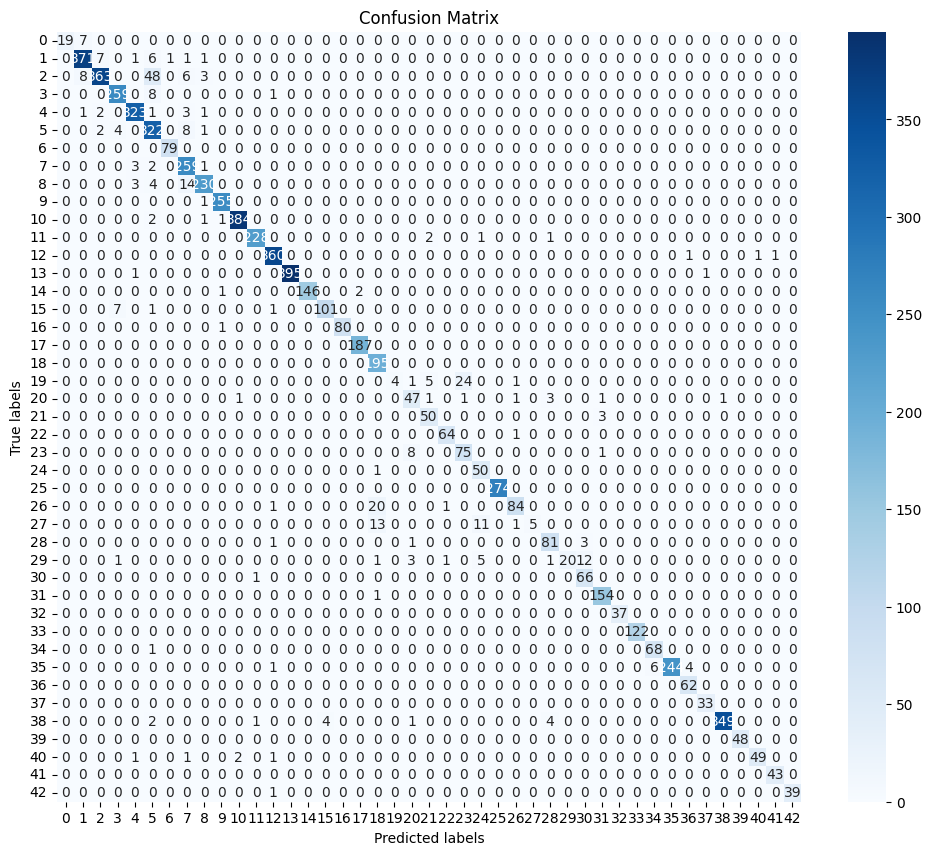

In [36]:
# from sklearn.metrics import confusion_matrix,classification_report
# import seaborn as sns

# # Generarea predicțiilor pentru setul de date de testare
# y_pred_prob = model.predict(X_test)
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Calcularea matricei de confuzie
# conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# # Vizualizarea matricei de confuzie folosind Seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.values(), yticklabels=data.values())
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# plt.show()
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generarea predicțiilor pentru setul de date de testare
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Vizualizarea matricei de confuzie folosind Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes),
            yticklabels=range(num_classes),
            annot_kws={"size": 10})  # Ajustează dimensiunea textului în celule
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)  # Îmbunătățește lizibilitatea etichetelor pe axa X
plt.yticks(rotation=0)  # Îmbunătățește lizibilitatea etichetelor pe axa Y

# Salvează imaginea ca JPG
image_path_jpg = '/content/drive/My Drive/Colab Notebooks/confusion_matrix1.jpg'
plt.savefig(image_path_jpg)

plt.show()


